In [209]:
!pip install pandas
!pip install numpy

In [210]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
print('Packages Imported')

Packages Imported


In [211]:
df = pd.read_csv('/content/Customer-Churn.csv')

In [212]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Cleaning**

In [213]:
df.shape #investigating the data shape

(7043, 21)

In [214]:
# copy the data
df_copy = df.copy()

In [215]:
list(df_copy.columns) # checking the available features

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [216]:
# checking for null values
df_copy.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [217]:
# Accessing the data summary statistics
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [218]:
df_copy.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [219]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce', downcast='integer')

In [220]:
df_copy.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [221]:
df_copy.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [222]:
df_copy.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [223]:
df_copy.dropna(inplace=True)

In [224]:
df_copy.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [225]:
mpl.style.use(['seaborn'])

<ipython-input-225-9f9b9e2275cf>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use(['seaborn'])


**Univariate Exploration**

In [226]:
plt.rcParams['figure.figsize'] = (6, 4)

In [227]:
def barchart(dataframe, X, rot=0):
    sns.countplot(data=dataframe, x=X)
    sns.set_style('dark')
    plt.xticks(rotation=rot)

    total_count = len(dataframe[X])
    for p in plt.gca().patches:
        count = p.get_height()
        percentage = f'{100 * count / total_count:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.annotate(percentage, (x, y), ha='center', va='bottom')


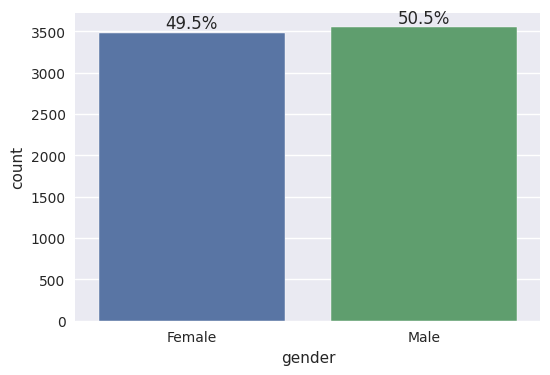

In [228]:
barchart(df_copy, 'gender')

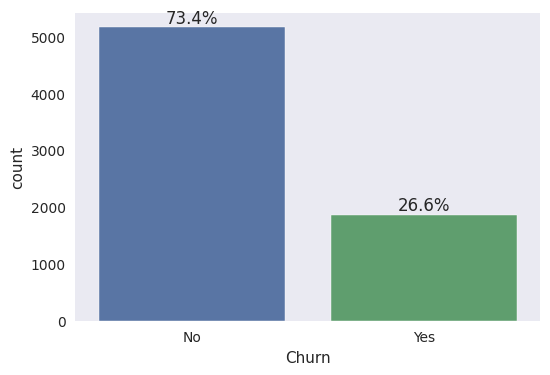

In [229]:
barchart(df_copy, 'Churn')

In [230]:
from IPython.utils.text import string
def count_val(df: object, column: string) -> None:
  print(df[column].value_counts())

In [231]:
count_val(df_copy, 'Churn')

No     5163
Yes    1869
Name: Churn, dtype: int64


In [232]:
count_val(df_copy, 'PaymentMethod')

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


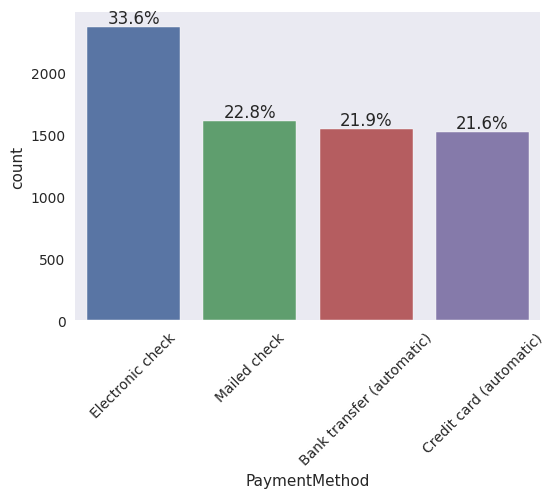

In [233]:
barchart(df_copy, 'PaymentMethod', 45)

Bivariate

In [234]:
def cat_plot(df, x, hue, kind='count'):
  sns.catplot(x=x, data=df, hue=hue, kind=kind, height=10);

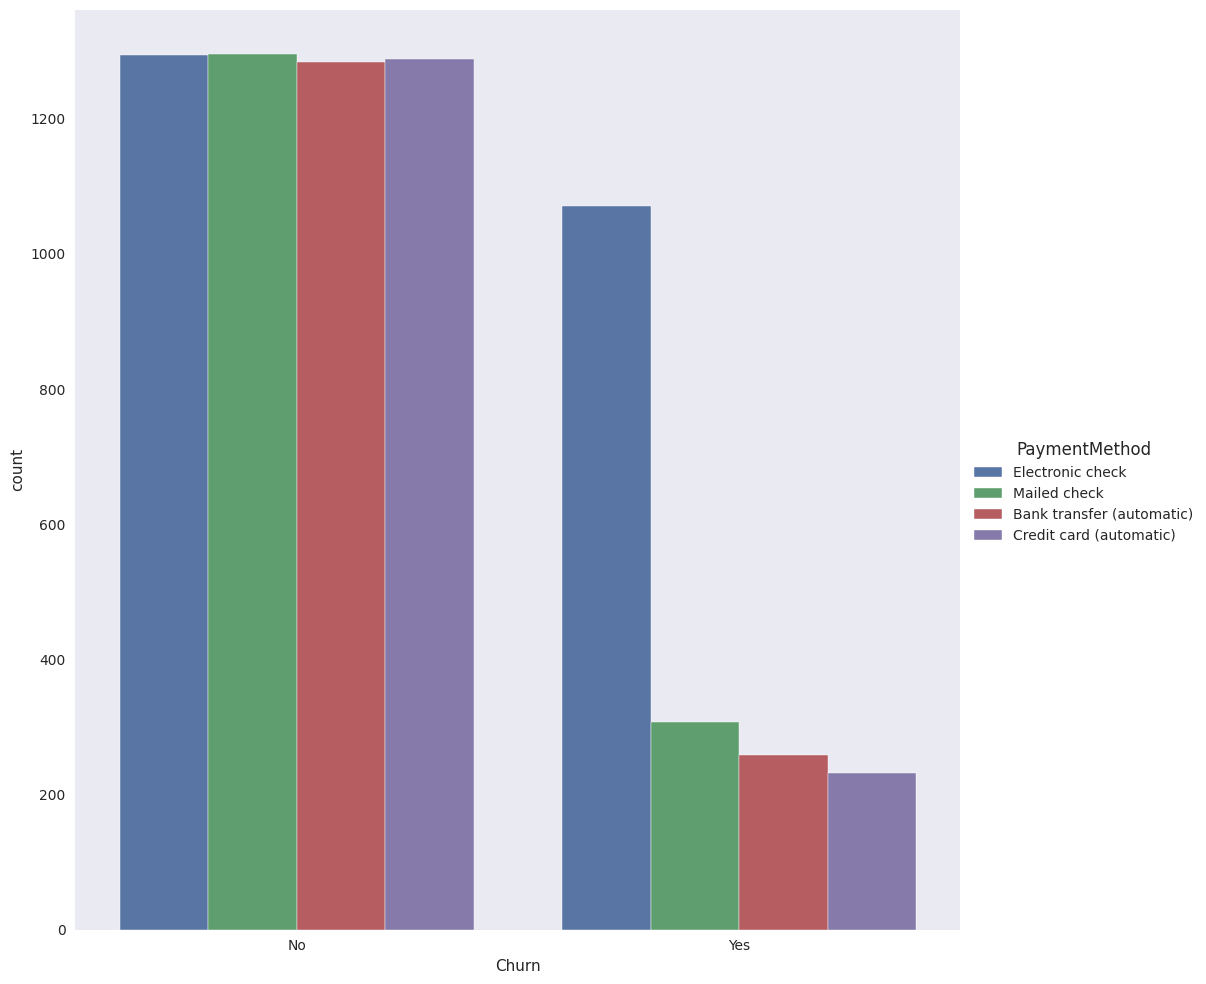

In [235]:
cat_plot(df_copy, 'Churn', 'PaymentMethod')

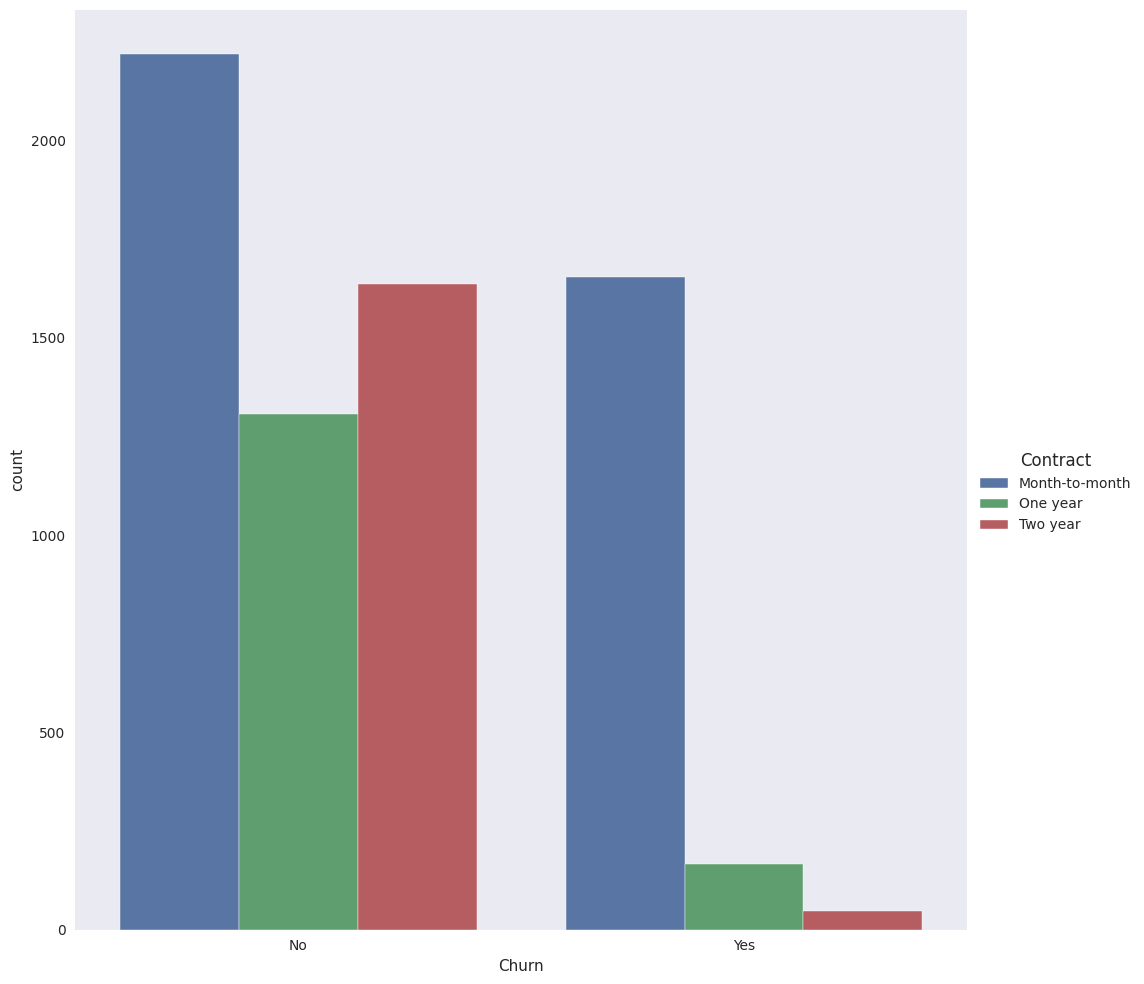

In [236]:
cat_plot(df_copy, 'Churn', 'Contract')

<Axes: xlabel='gender', ylabel='count'>

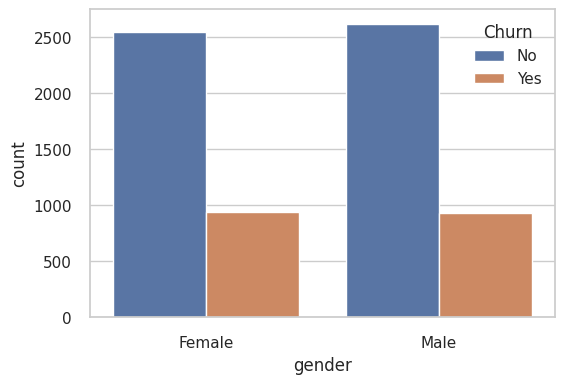

In [237]:
sns.set_theme(style='whitegrid')
sns.countplot(x='gender', hue='Churn', data=df_copy)

In [238]:
cor = df_copy.corr()
cor

<ipython-input-238-637c470eff03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_copy.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


This shows theres a strong corelation between customer tenure and their total charges, which could lead to multicolinearit constraints for the model thereby cause overfitting

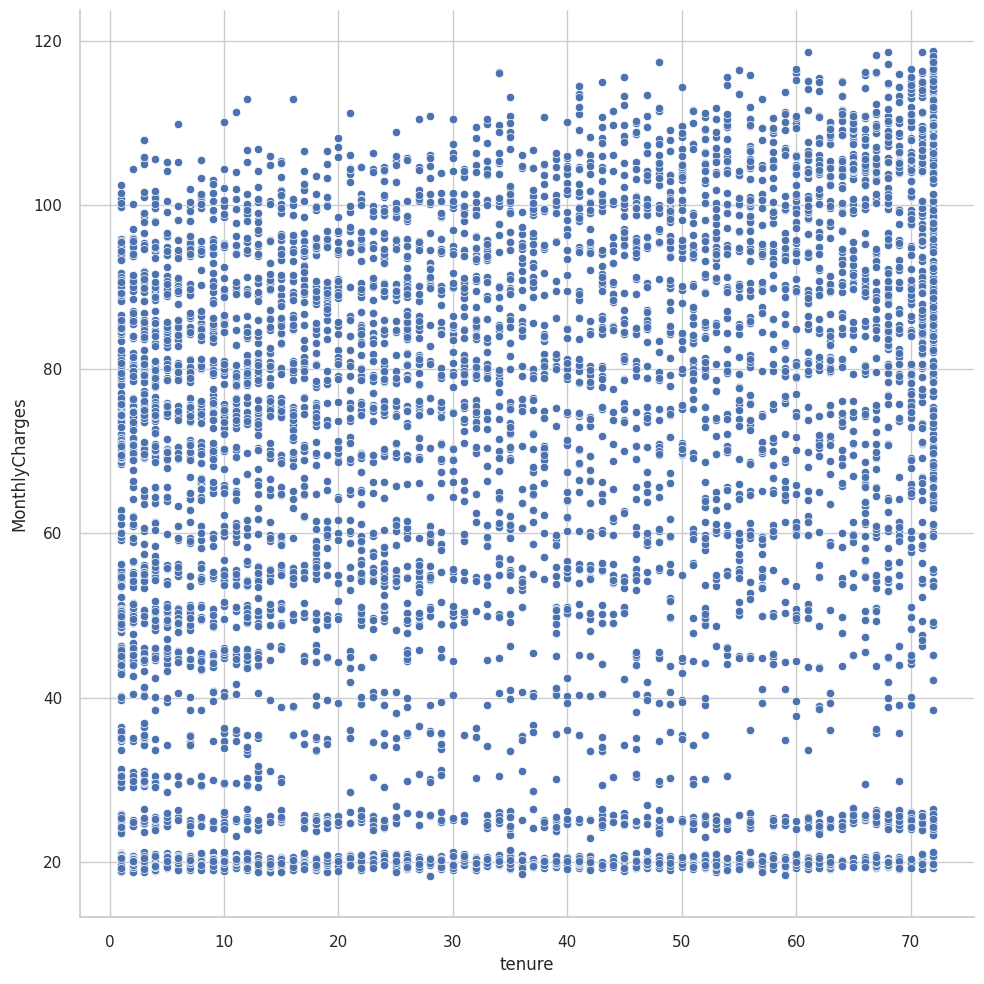

In [239]:
sns.relplot(x='tenure', y='MonthlyCharges', data=df_copy,
           kind='scatter', height=10);

<Axes: >

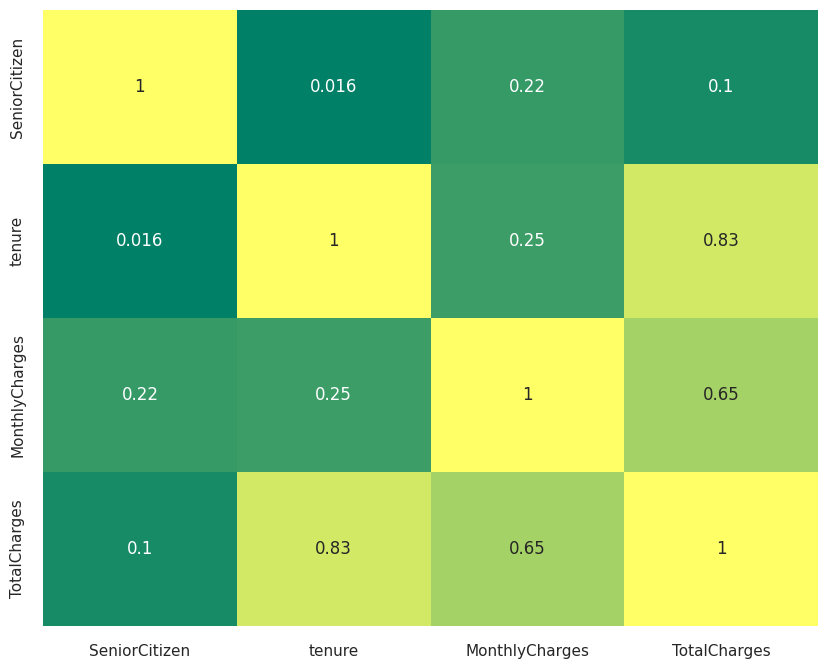

In [240]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cor, annot = True, cbar = False, cmap = 'summer')
heatmap

In [241]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The `kind`
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with `kind="strip"`; the default)
    - :func:`swarmpl

Text(0.5, 1.0, 'Monthly Charges per Distribution')

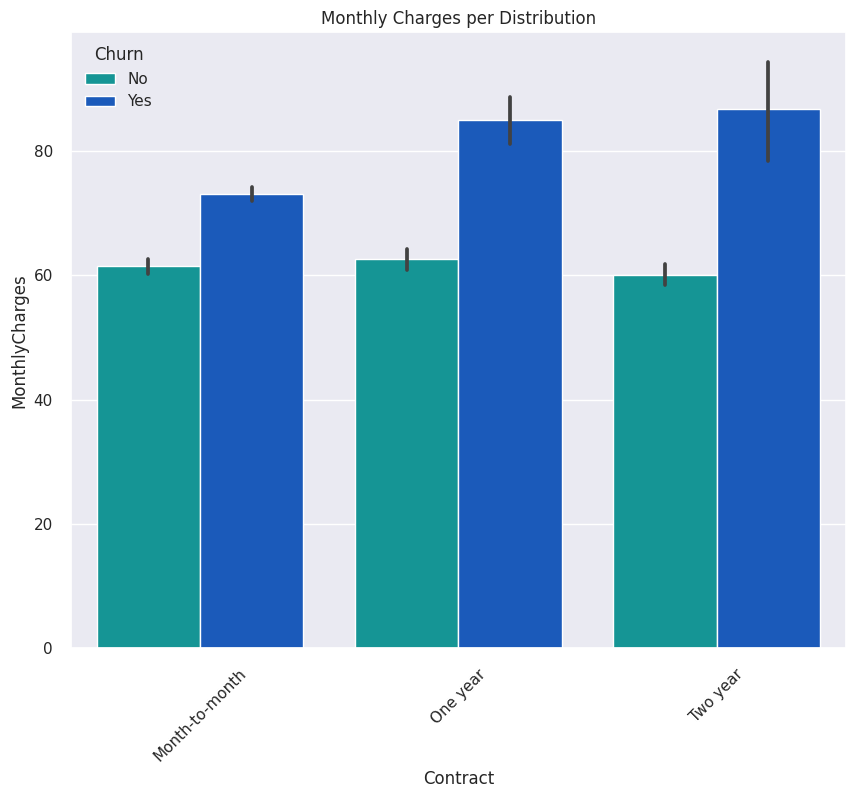

In [242]:
plt.figure(figsize=(10, 8))
sns.set_style(style='darkgrid')
sns.barplot(data=df_copy, x='Contract', y='MonthlyCharges', hue="Churn", palette='winter_r');
plt.xticks(rotation=45);
plt.title('Monthly Charges per Distribution')

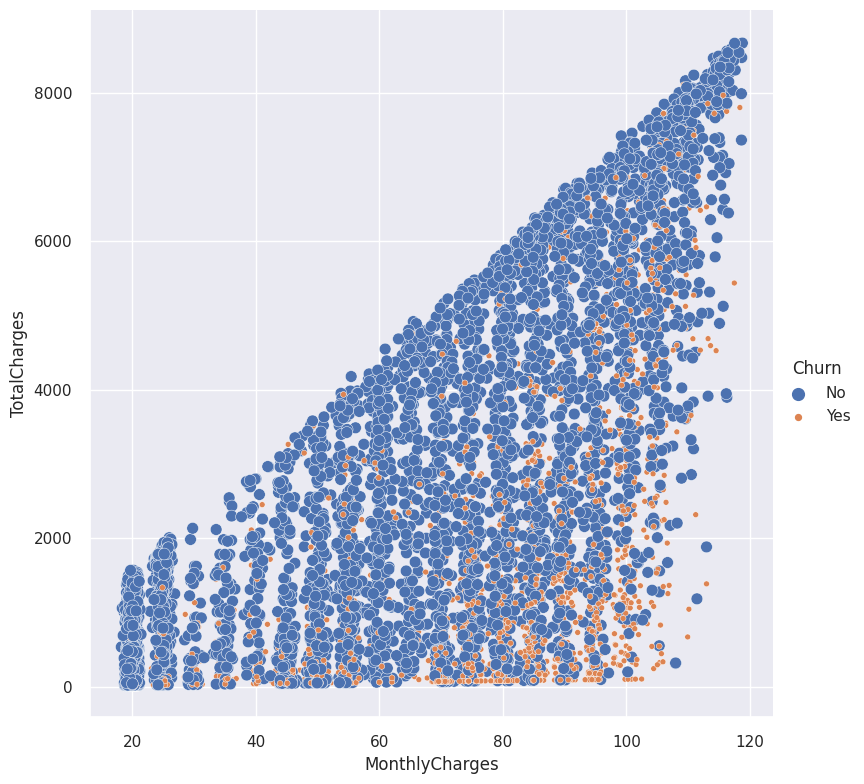

In [243]:
sns.relplot(x='MonthlyCharges', y='TotalCharges', data=df_copy,
           kind='scatter', hue='Churn', size='Churn', height=8);

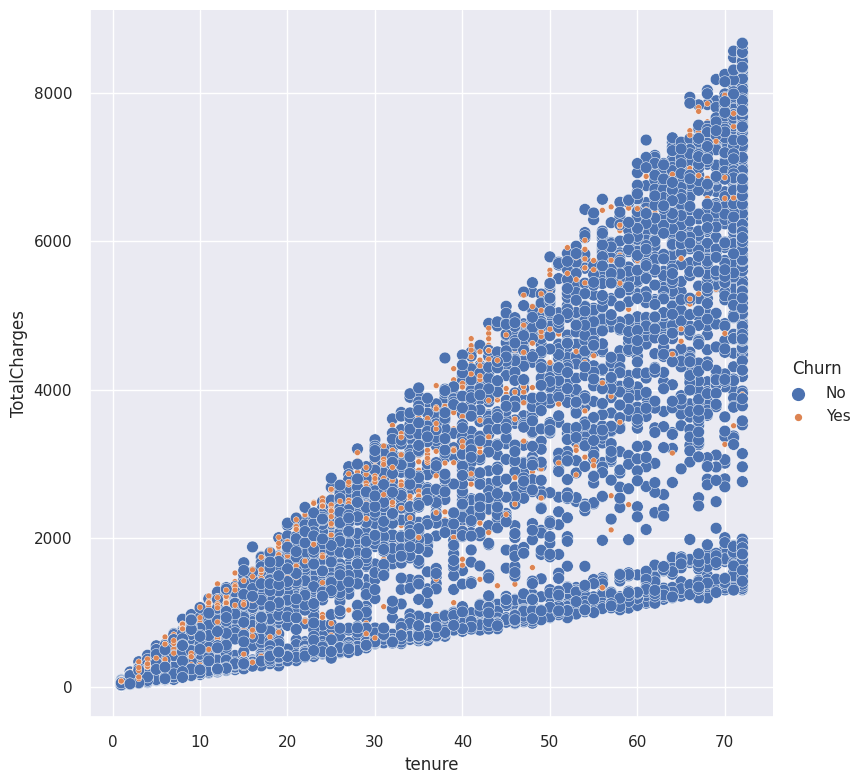

In [244]:
sns.relplot(x='tenure', y='TotalCharges', data=df_copy,
           kind='scatter', hue='Churn', size='Churn', height=8);

In [245]:
df_copy["Churn"] = df_copy["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
df_copy["Churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [246]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [247]:
cor = df_copy.corr()
cor

<ipython-input-247-637c470eff03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_copy.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


**One Hot encoding**

In [248]:
df_copy.drop('customerID', axis='columns', inplace=True)

In [249]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [250]:
y = df_copy['Churn']

In [251]:
X = pd.get_dummies(df_copy)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [252]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [253]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# **Model Building**

In [254]:
# importing the model library for training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Creating the model variables using the test slpit functions and the hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 32)


Logistic Model

In [255]:
# Modelling, predicting and evaluating
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'accuracy score is : ',  str(round(accuracy_test * 100, 2)) + '%')

accuracy score is :  100.0%


In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



In [257]:
def Confusion_Matrix (ytest, ypred, label = ['Negative', 'Positive']):
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(10, 6))
  sns.heatmap(cm, annot = True, cbar = False, fmt='d', cmap = 'inferno')
  plt.xlabel('Actual', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Predicted', fontsize = 13)
  plt.title('Confusion Matrix');

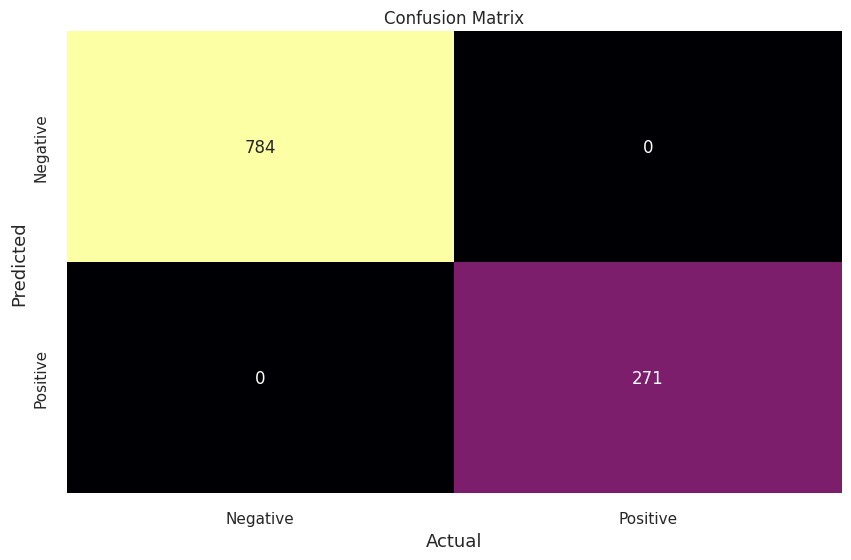

In [258]:
Confusion_Matrix(y_test, y_pred)

Decision Tree Model

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [261]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055

Confusion Matrix:
[[784   0]
 [  0 271]]


Xgboost

In [262]:
!pip install xgboost

In [263]:
import xgboost as xgb

In [264]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055

Confusion Matrix:
[[784   0]
 [  0 271]]


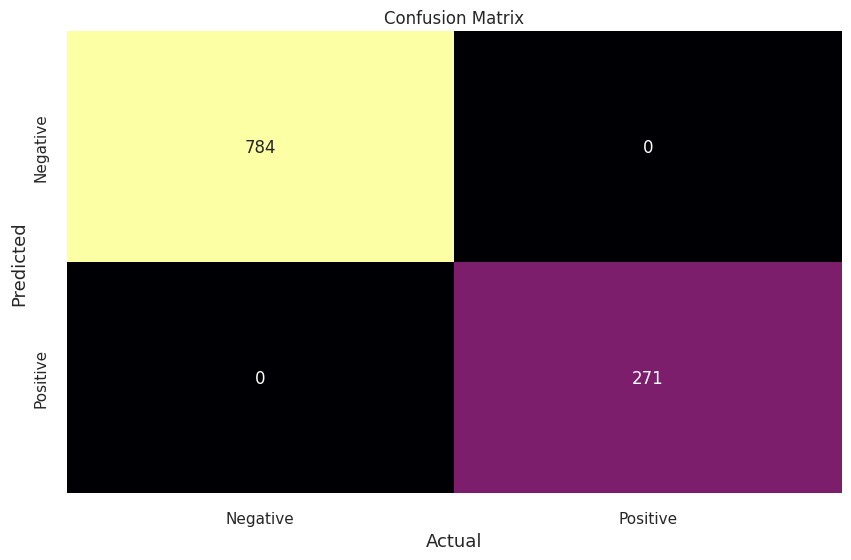

In [265]:
Confusion_Matrix(y_test, y_pred)

From the model evaluation, the business should be more concerned with the false positive, as the model predics more customer churns when did not actually do.